In [26]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import missingno as msno
%matplotlib inline


In [27]:
import warnings
warnings.filterwarnings('ignore')


In [28]:
df = pd.read_csv(r'C:\Users\user\Downloads\Expanded_data_with_more_features.csv/Expanded_data_with_more_features.csv')

In [31]:
df.head(10)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


In [32]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [34]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# Drop unnamed column

In [35]:
df = df.drop('Unnamed: 0', axis=1)
df.head(3)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91


# Change weekly study hours 

In [36]:
df['WklyStudyHours'] = df['WklyStudyHours'].str.replace("05-Oct","5-10")
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


## Gender distributon

[Text(0, 0, '15424'), Text(0, 0, '15217')]

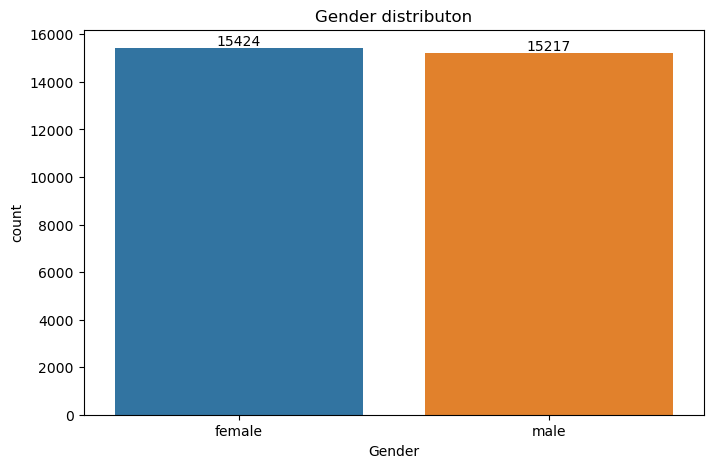

In [55]:
plt.figure(figsize=(8,5))
plt.title("Gender distributon")
ax = sns.countplot(data=df, x ="Gender")
ax.bar_label(ax.containers[0])

### Result: 
 - The gender count of females are moe than male 

In [47]:
gb = df.groupby("ParentEduc").agg({"MathScore":'mean', "ReadingScore":"mean","WritingScore":"mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


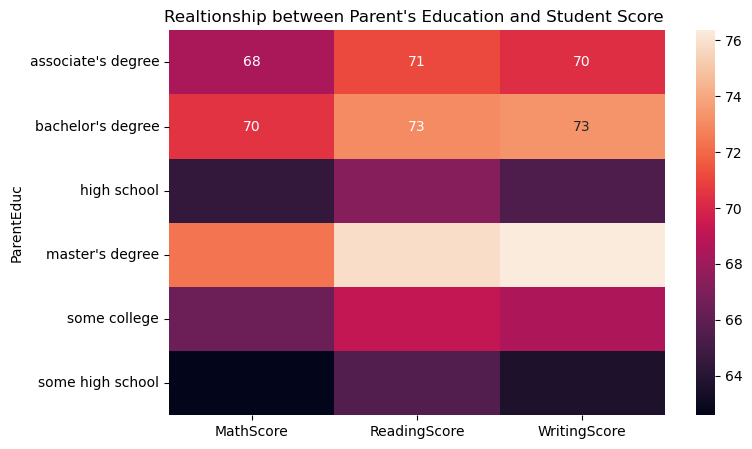

In [59]:
plt.figure(figsize=(8,5))
plt.title("Realtionship between Parent's Education and Student Score ")
sns.heatmap(gb, annot = True)
plt.show()

### Result :
### Parent(s) educational background¶

<ul>
<li>There are six categories of educational background of parent(s) of the students, ranging from master's education (the highest  level)<br> to highschool dropouts (some high school).</li>
<li>In terms of distribution, master's degree holder parent(s) are the least at 7% and parent(s) with <br> some college are the most at 23%.</li>
<li>When it comes to the students' test scores, there seems to be a clear correlation with their <br> parents educational background</li>
<li> Children of highly educated parents score better than the children of less educated parents.<br>This pattern is seen consistently  with all three test subjects.</li>
</ul>                            ts.);

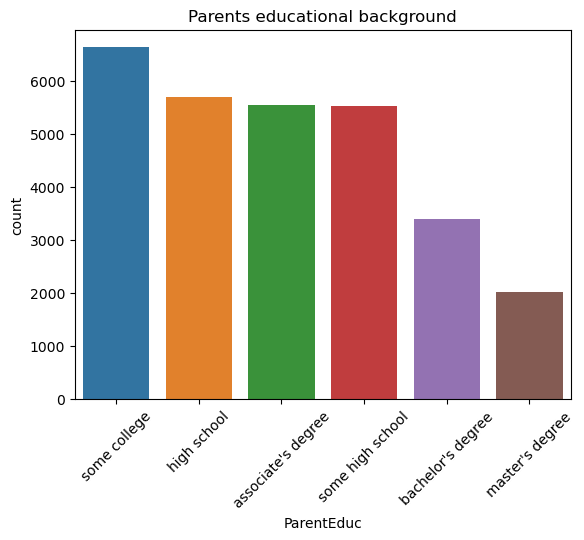

In [86]:
sns.countplot(x=df['ParentEduc'], \
              order=['some college', 'high school', "associate's degree", 'some high school', "bachelor's degree", "master's degree"])
plt.title('Parents educational background')
plt.xticks(rotation=45);

In [53]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore":'mean', "ReadingScore":"mean","WritingScore":"mean"})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


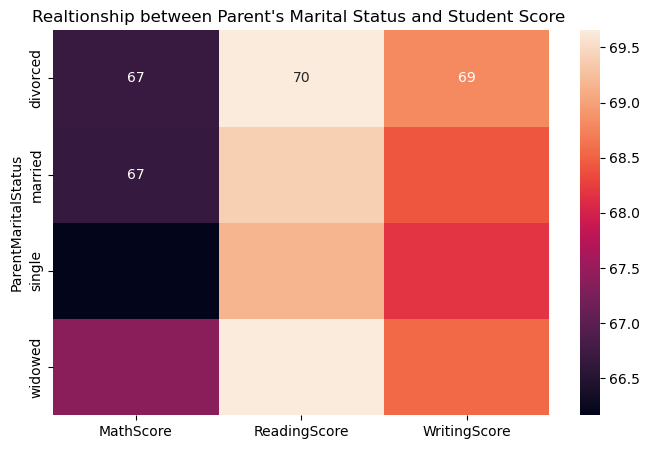

In [60]:
plt.figure(figsize=(8,5))
plt.title("Realtionship between Parent's Marital Status and Student Score ")
sns.heatmap(gb1, annot = True)
plt.show()

### Result :
-- We can conclude that there is no impact in student score due to the parents martial status

### Checking for outliers

<Axes: xlabel='MathScore'>

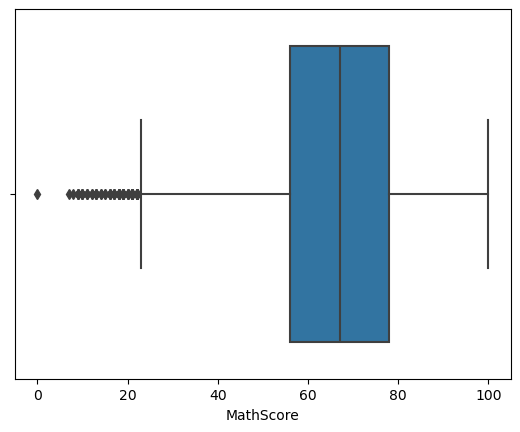

In [62]:
sns.boxplot(data=df, x= 'MathScore')

In [64]:
df['EthnicGroup'].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

## Distribution of Ethnic Groups

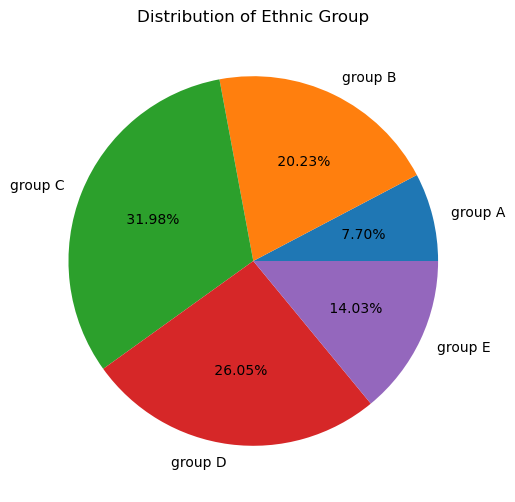

In [82]:
Group_A = df.loc[(df['EthnicGroup']== "group A")].count()
Group_B = df.loc[(df['EthnicGroup']== "group B")].count()
Group_C = df.loc[(df['EthnicGroup']== "group C")].count()
Group_D = df.loc[(df['EthnicGroup']== "group D")].count()
Group_E = df.loc[(df['EthnicGroup']== "group E")].count()
plt.figure(figsize=(10,6))
l = ['group A','group B','group C','group D','group E']
mlist = [Group_A["EthnicGroup"],Group_B["EthnicGroup"],Group_C["EthnicGroup"],Group_D["EthnicGroup"],Group_E["EthnicGroup"]]
plt.pie(mlist, labels = l, autopct ="% 1.2f%%")
plt.title("Distribution of Ethnic Group")
plt.show()

### Ethnic group¶

<ul>
<li>There are five races/ethnic groups represented in the dataset; (anonymized) from group A to group E</li>
<li>With ~32% of the student population, race group C are the most represented whereas with only ~8% race group A are the least.</li>
<li>The effect of race on students' performance is clear to see. Race group E students are by far the better performers having <br> scored 7-points more than the second group (D) in math and 4 more points in reading score and close to 2 points in writing test.<br> At the other end of the scoreboard we find race group A; this group scored more than 12-points on math lower than that of group E!  </li>     
</ul>                

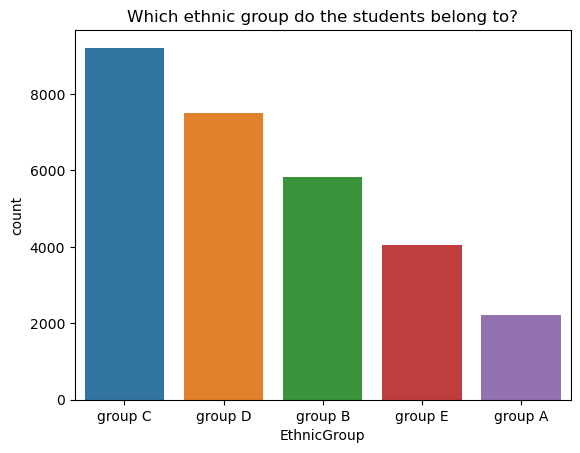

In [87]:
sns.countplot(x=df['EthnicGroup'], \
              order=['group C', 'group D', 'group B', 'group E', 'group A'])
plt.title('Which ethnic group do the students belong to?');

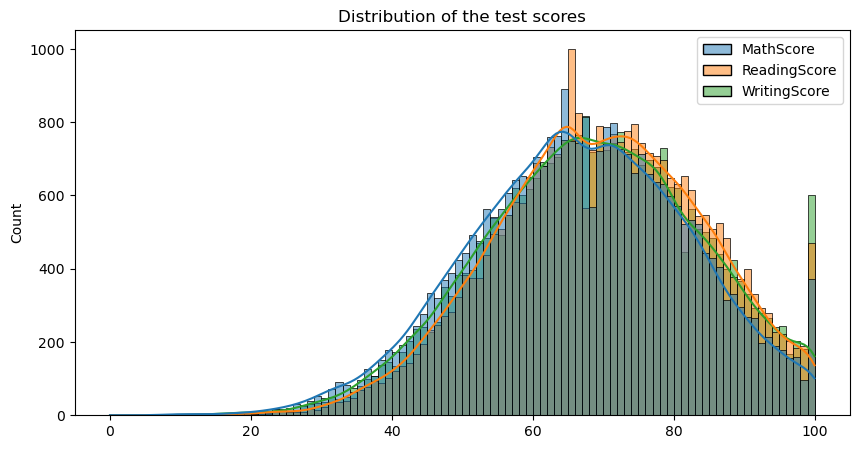

In [85]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df[['MathScore', 'ReadingScore', 'WritingScore']], bins=100,  kde=True)
plt.title('Distribution of the test scores');

### Weekly study hours¶
<ul>
<li>This feature is a weekly study hours the students had been studying after school. <br> There are three distinct values less that 5hrs a week, between 5 -10hrs per week and more than 10hrs per week.</li>
<li>More than half (56%) of the students study between 5 - 10 hrs. However, only 17% used more than 10 hrs weekly study hours.</li>
<li>Test score result shows that performance is direclty related to the hours spent studying.</li>  
</ul>   

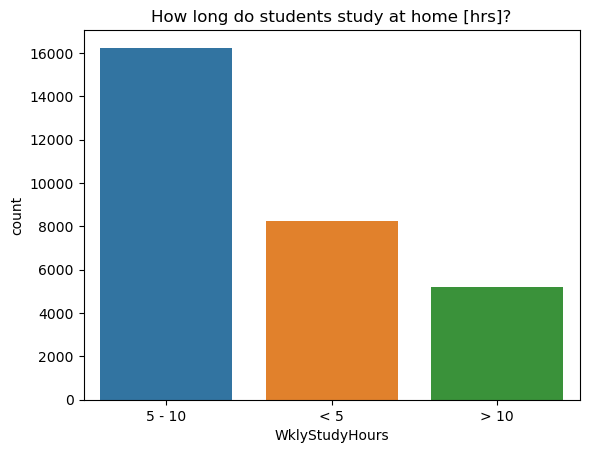

In [90]:
sns.countplot(x=df['WklyStudyHours'], \
             order=['5 - 10', '< 5', '> 10'])
plt.title('How long do students study at home [hrs]?');

### Test-prep course¶

<ul>
<li>Almost two-third of the student poppulation did not take a test preparation course.</li>
<li>Logically this features had also a positive impact on test score; reading test inparticular was hight affected by test preparation course.</li>
</ul>  

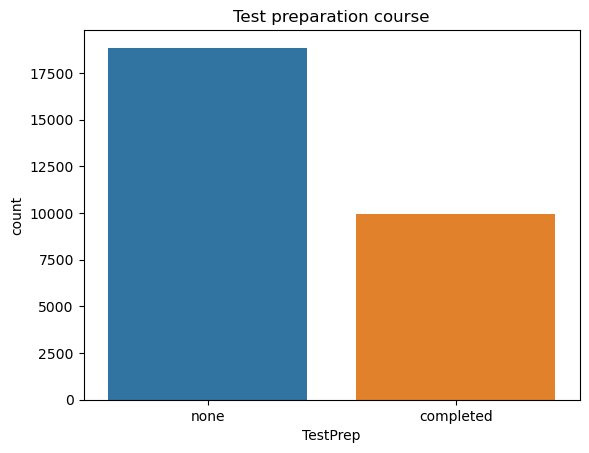

In [92]:
sns.countplot(x=df['TestPrep'])
plt.title('Test preparation course');


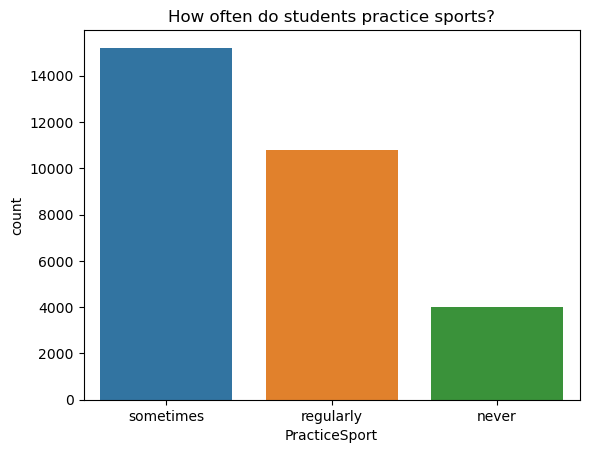

In [93]:
sns.countplot(x=df['PracticeSport'], \
             order = ['sometimes', 'regularly', 'never'])
plt.title('How often do students practice sports?');

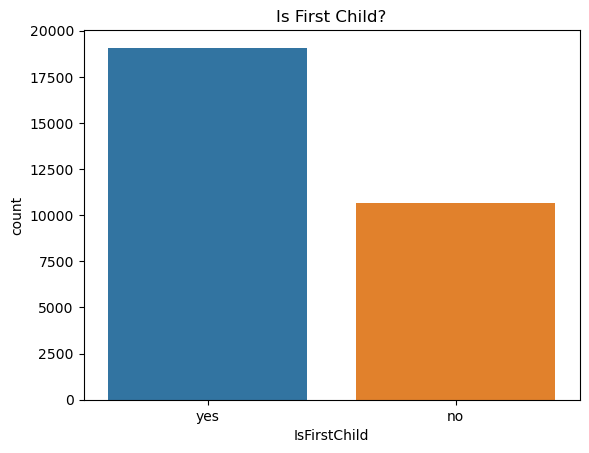

In [95]:
sns.countplot(x=df['IsFirstChild'])
plt.title('Is First Child?');

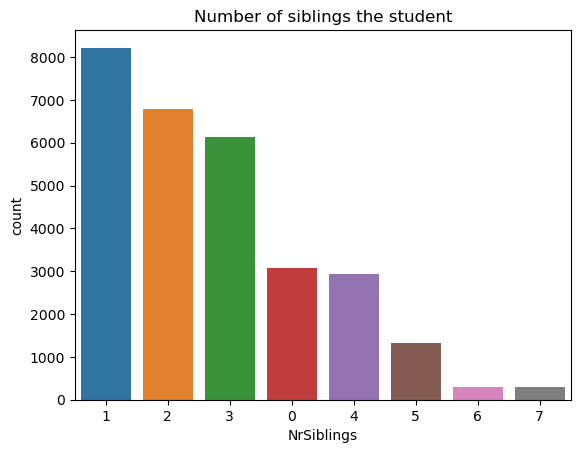

In [97]:
sns.countplot(x=df['NrSiblings'],
             order=[1, 2, 3, 0, 4, 5, 6, 7]
             )
plt.title('Number of siblings the student');

### Number of siblings the student has¶
<ul>
<li>This feature has little to no effect on score. On writing and reading tests there is only just over 1 point difference and on math test about 1.7 points between two groups of students i.e, students with 7 siblings coming on top while students with 6 students coming at the bottom of the rank. Doubt this makes a lot of sense.</li></ul>  

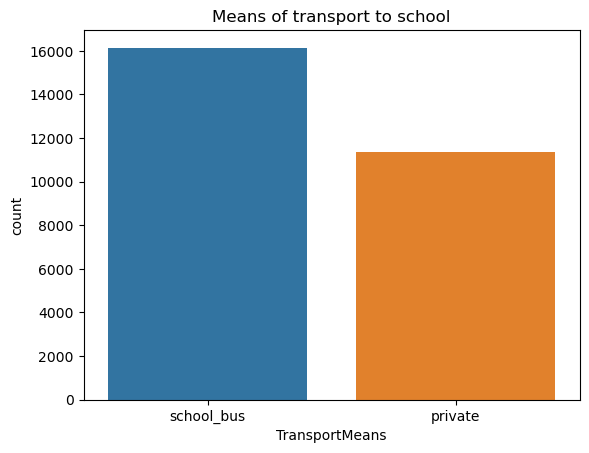

In [99]:
sns.countplot(x=df['TransportMeans'])
plt.title('Means of transport to school');

In [101]:
df.groupby(['Gender', 'ParentEduc'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\
.style.background_gradient(cmap='Blues')

In [103]:
df.groupby(['EthnicGroup', 'Gender'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\
.style.background_gradient(cmap='Blues')

In [104]:
df.groupby(['PracticeSport', 'TestPrep'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\
.style.background_gradient(cmap='Blues')

In [105]:
df.groupby(['PracticeSport', 'WklyStudyHours'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\
.style.background_gradient(cmap='Blues')

In [106]:
df.groupby(['Gender', 'PracticeSport'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\
.style.background_gradient(cmap='Blues')